In [6]:
# 
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/HospitalityEmployees.csv',index_col='Date',parse_dates=True)

In [11]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [12]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [13]:
train.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [16]:
from fbprophet import Prophet

In [17]:
model = Prophet()
model

In [18]:
train_0 = train.reset_index() 
test_0 = test.reset_index() 

In [19]:
train_0.head()

,Date,Employees
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [22]:
train_0.columns = ['ds', 'y'] 
test_0.columns = ['ds', 'y'] 

In [23]:
train_0.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [24]:
model.fit(train_0)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = model.make_future_dataframe(periods=12, freq='MS') 
future.tail(12)

,ds
336,2018-01-01
337,2018-02-01
338,2018-03-01
339,2018-04-01
340,2018-05-01
341,2018-06-01
342,2018-07-01
343,2018-08-01
344,2018-09-01
345,2018-10-01


In [26]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,1105.140489,1049.323087,1067.705758,1105.140489,1105.140489,-46.211417,-46.211417,-46.211417,-46.211417,-46.211417,-46.211417,0.0,0.0,0.0,1058.929072
1,1990-02-01,1105.802454,1064.510540,1082.751046,1105.802454,1105.802454,-31.904082,-31.904082,-31.904082,-31.904082,-31.904082,-31.904082,0.0,0.0,0.0,1073.898372
2,1990-03-01,1106.400357,1080.160809,1097.845009,1106.400357,1106.400357,-17.429935,-17.429935,-17.429935,-17.429935,-17.429935,-17.429935,0.0,0.0,0.0,1088.970422
3,1990-04-01,1107.062322,1095.238654,1114.232696,1107.062322,1107.062322,-2.276962,-2.276962,-2.276962,-2.276962,-2.276962,-2.276962,0.0,0.0,0.0,1104.785359
4,1990-05-01,1107.702933,1112.929541,1130.102945,1107.702933,1107.702933,14.034054,14.034054,14.034054,14.034054,14.034054,14.034054,0.0,0.0,0.0,1121.736986


In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
343,2018-08-01,2076.369515,2066.093907,2087.442646
344,2018-09-01,2067.030396,2054.619089,2078.844588
345,2018-10-01,2054.682992,2042.109132,2067.539237
346,2018-11-01,2052.813211,2039.720887,2066.506283
347,2018-12-01,2063.225608,2049.662747,2077.873082


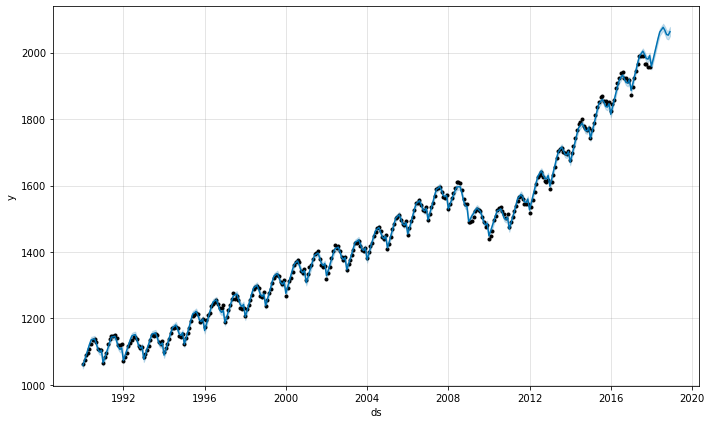

In [28]:
model.plot(forecast);

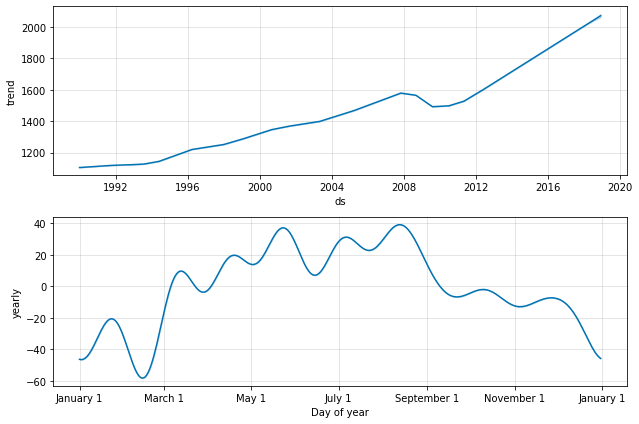

In [29]:
model.plot_components(forecast);

In [30]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast['yhat'].tail(12), test_0['y']) 

51.062927174242624

In [31]:
modul_dif = np.abs(forecast.tail(12).reset_index()['yhat'] - test_0['y']) 

dif = np.mean(modul_dif/test_0['y'])

dif_percent = dif*100 

dif_percent

2.5677471600830106

In [32]:
np.mean(np.abs(forecast.tail(12).reset_index()['yhat'] - test_0['y'])/test_0['y'])*100

2.5677471600830106

In [33]:
model_1 = Prophet(growth = 'linear', yearly_seasonality = True, seasonality_mode='additive') 
model_1.fit(train_0) 

future_1 = model_1.make_future_dataframe(periods=12, freq='MS') 
forecast_1 = model_1.predict(future_1) 
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(12), test_0['y'])
print('MSE: ', error_forecast_1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE:  51.062927174242624


In [34]:
np.mean(np.abs(forecast_1.tail(12).reset_index()['yhat'] - test_0['y'])/test_0['y'])*100

2.5677471600830106